In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from pandas import Series, DataFrame
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%pylab inline
import matplotlib
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [168]:
train = pd.read_csv("Levels_Fyi_Salary_Data.csv")
train.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [169]:
display(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

None

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


timestamp has >50 categories and is unable to display properly


2/25/2020 13:24     4
2/25/2020 13:25     4
10/31/2018 19:57    4
8/13/2021 18:44     4
10/31/2018 17:04    4
Name: timestamp, dtype: int64

company has >50 categories and is unable to display properly


Amazon       8126
Microsoft    5216
Google       4330
Facebook     2990
Apple        2028
Name: company, dtype: int64

level has >50 categories and is unable to display properly


L4                          5014
L5                          4871
L3                          3337
L6                          2871
Senior Software Engineer    1443
Name: level, dtype: int64

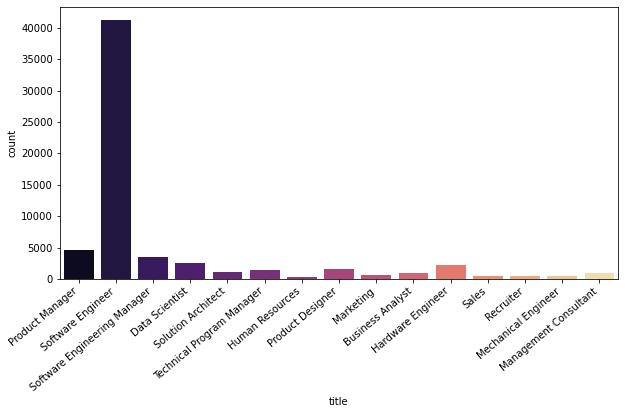

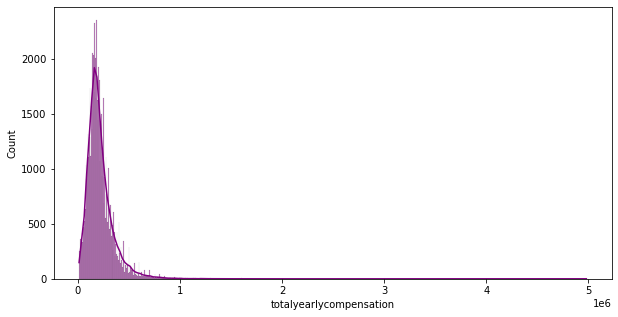

location has >50 categories and is unable to display properly


Seattle, WA          8701
San Francisco, CA    6797
New York, NY         4562
Redmond, WA          2649
Mountain View, CA    2275
Name: location, dtype: int64

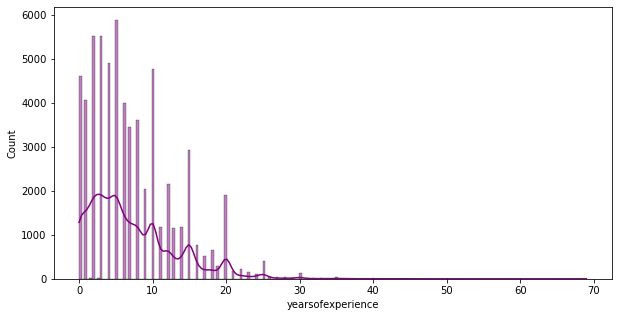

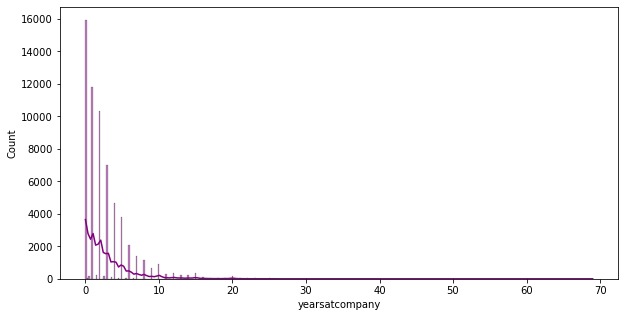

tag has >50 categories and is unable to display properly


Full Stack                        11382
Distributed Systems (Back-End)    10838
API Development (Back-End)         6277
ML / AI                            4204
Web Development (Front-End)        2971
Name: tag, dtype: int64

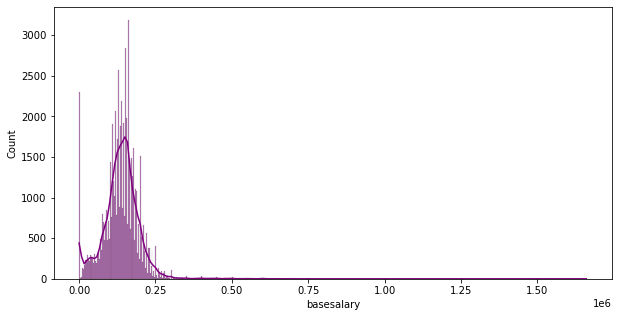

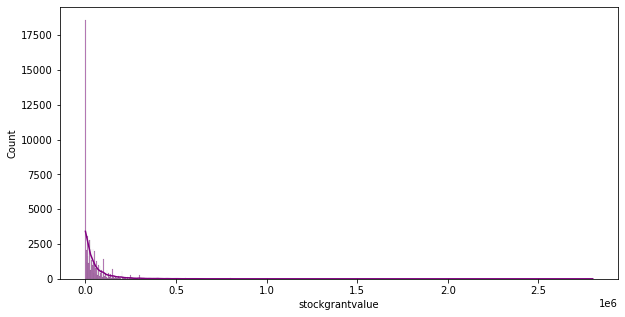

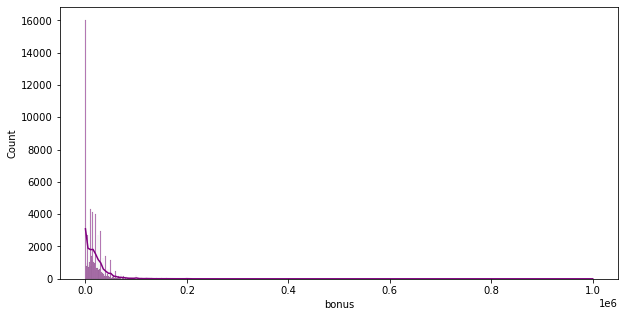

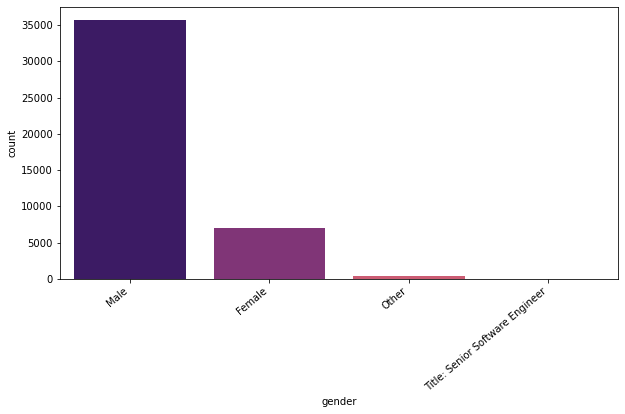

otherdetails has >50 categories and is unable to display properly


Masters                                           3983
Title: Software Engineer                          1453
Race: Asian, Academic Level: Master’s degree      1213
Race: White, Academic Level: Bachelor’s degree    1075
Race: Asian, Academic Level: Bachelor’s degree     977
Name: otherdetails, dtype: int64

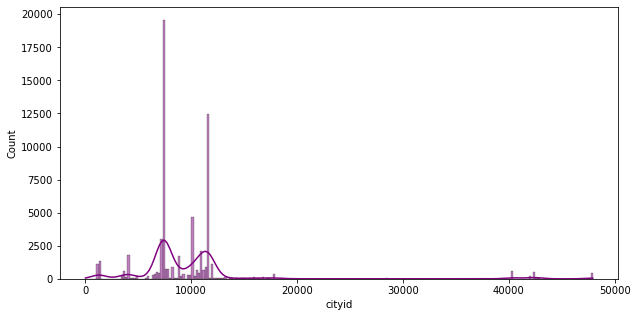

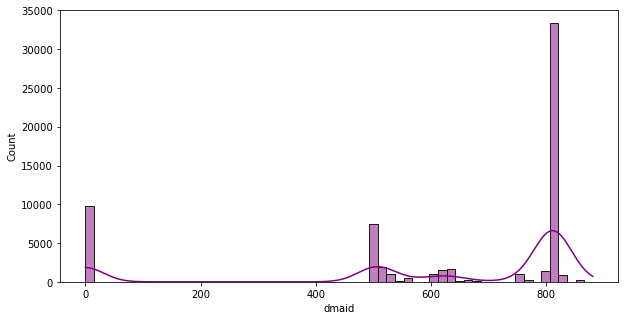

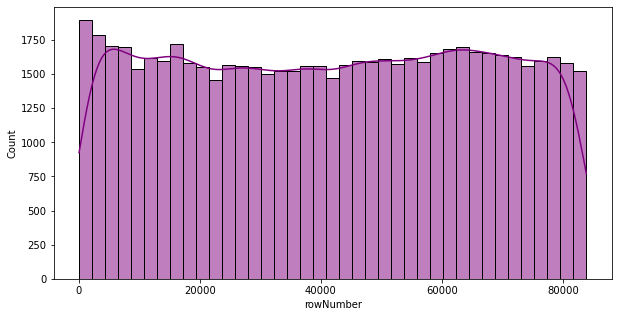

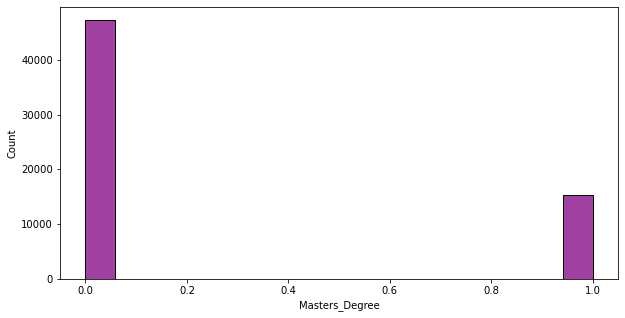

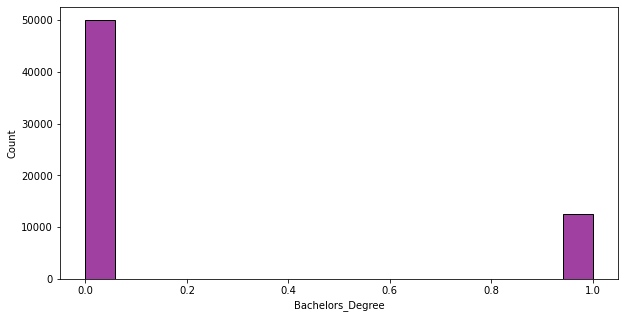

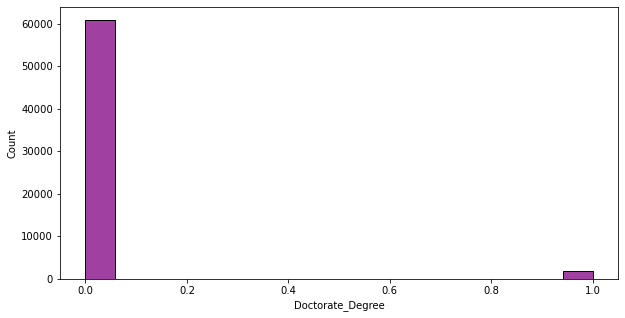

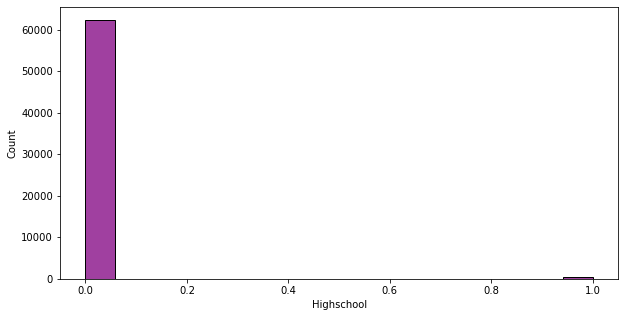

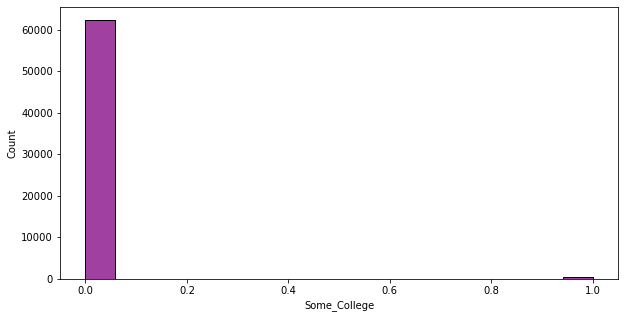

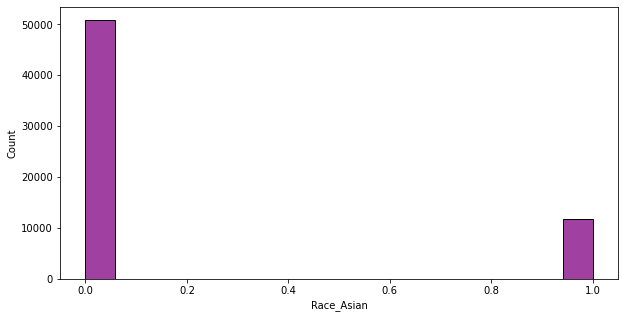

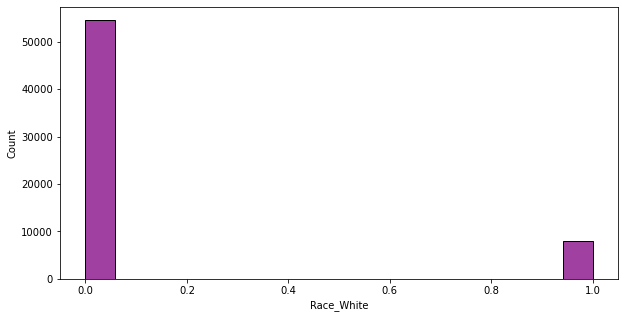

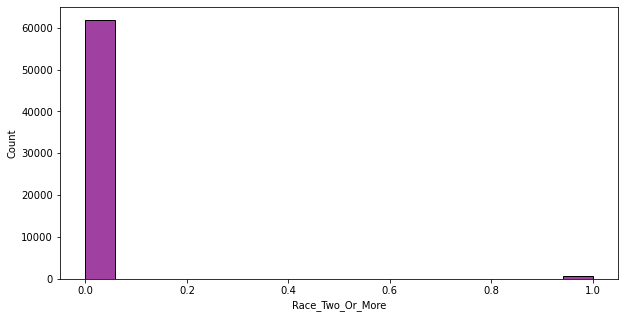

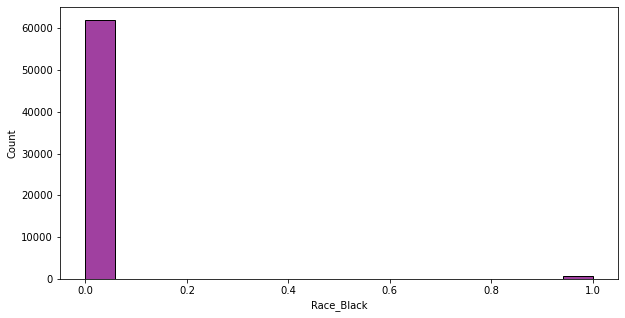

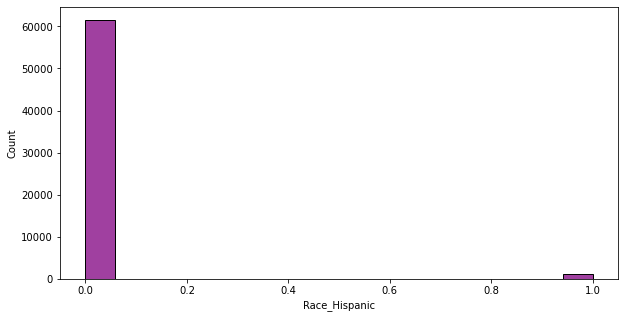

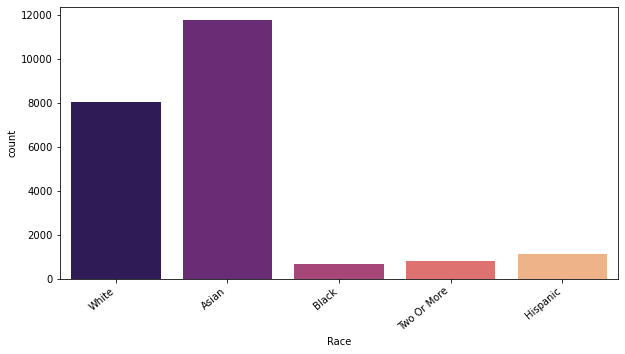

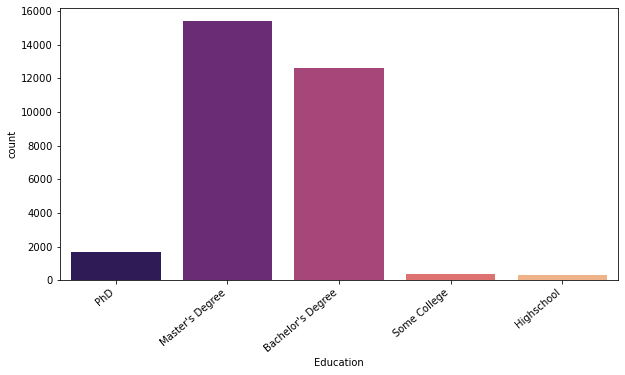

In [170]:
#Univariate analysis
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
for c in train.columns:
    if train[c].dtype in ['object','bool']: #categorical column
        if (len(train[c].unique())>50):
            print(str(c) + " has >50 categories and is unable to display properly")
            display(train[c].value_counts().head())
            continue
        plt.figure(figsize=(10,5))
        ax=sns.countplot(train[c],palette='magma')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.show()
    else: #numerical column
        plt.figure(figsize=(10,5))
        sns.histplot(train[c],kde=(len(train[c].unique())>10),color='purple')
        plt.show()

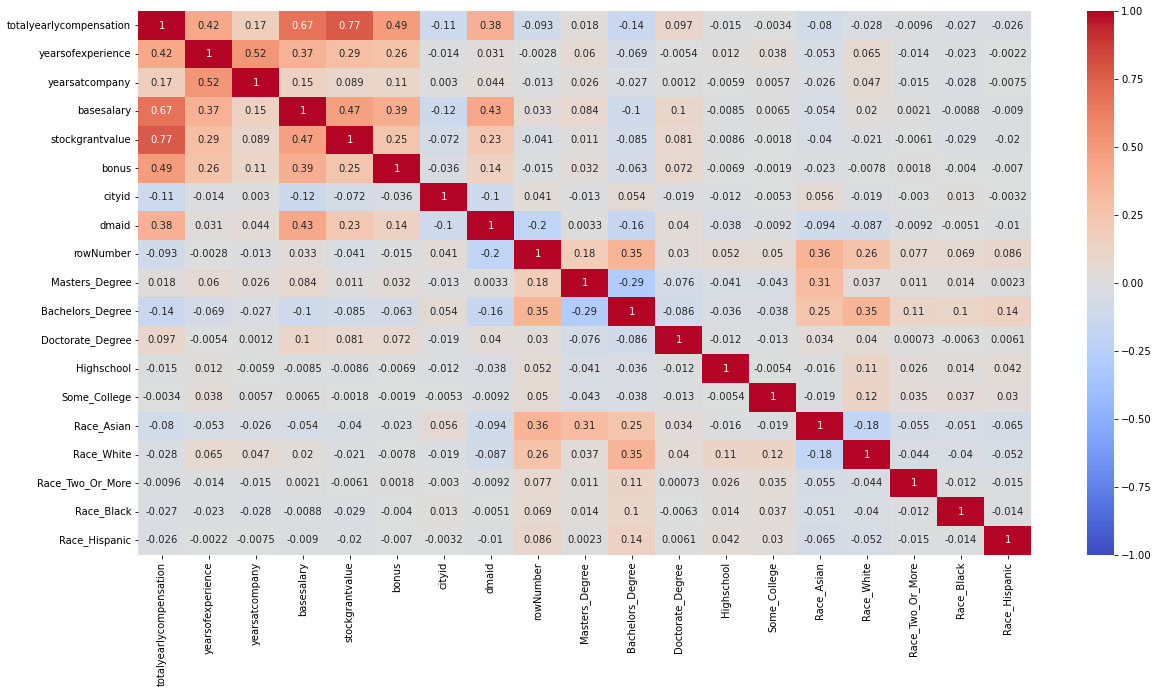

In [171]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [172]:
#Preprocessing
#otherdetails, Race and Education columns are redundant, drop
train.drop(['otherdetails','Race','Education'],axis=1,inplace=True)
#since basesalary, stockgrantvalue, and bonus seem to sum to total compensation, drop those too
train.drop(['basesalary','stockgrantvalue','bonus'],axis=1,inplace=True)

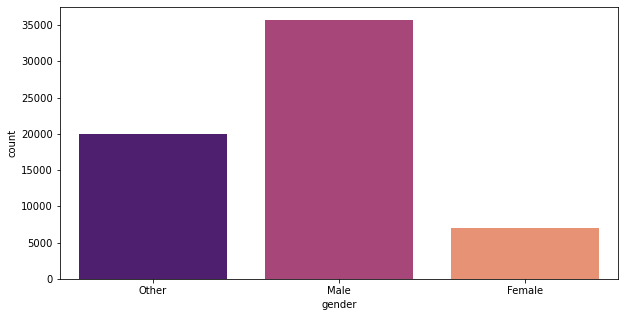

In [173]:
import numpy as np
train['gender'].replace('Title: Senior Software Engineer', np.nan,inplace=True) #replace invalid value
train['gender'].unique()
train['gender'].replace(np.nan,'Other',inplace=True) #replace nans with other
plt.figure(figsize=(10,5))
sns.countplot(train['gender'],palette='magma')
plt.show()

In [174]:
train.isna().sum()

timestamp                    0
company                      5
level                      119
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
yearsatcompany               0
tag                        854
gender                       0
cityid                       0
dmaid                        2
rowNumber                    0
Masters_Degree               0
Bachelors_Degree             0
Doctorate_Degree             0
Highschool                   0
Some_College                 0
Race_Asian                   0
Race_White                   0
Race_Two_Or_More             0
Race_Black                   0
Race_Hispanic                0
dtype: int64

In [175]:
fixnan = ['company','level','tag','dmaid']
for c in fixnan:
    train[c].replace(np.nan,'Other',inplace=True) #replace nans with other
train.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

Text(0.5, 0, 'Company Name')

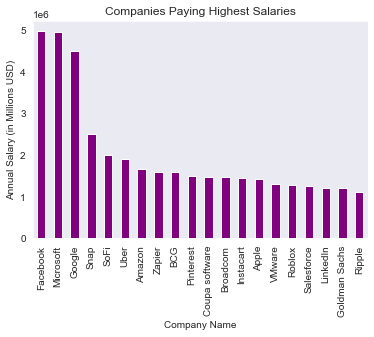

In [194]:
from matplotlib import pyplot as plt

high_sal =train.sort_values(by='totalyearlycompensation',ascending=False).drop_duplicates(subset='company', keep='first')
#uni_high_sal = high_sal['company'].unique()
high_sal_comp= high_sal.set_index('company')
high_sal_comp['totalyearlycompensation'][:20].plot(kind='bar',color='purple')

plt.title("Companies Paying Highest Salaries")
plt.ylabel("Annual Salary (in Millions USD)")
plt.xlabel("Company Name")


Text(0.5, 0, 'Company Name')

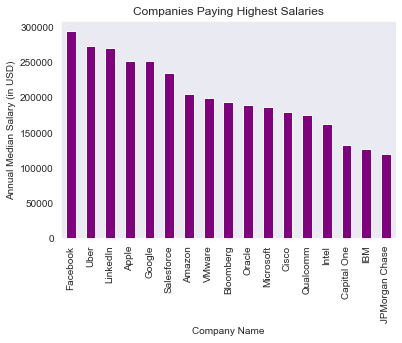

In [381]:
from matplotlib import pyplot as plt

#val_title =['Marketing','Data Scientist','Product Designer','Business Analyst']
#not_level =[
#pivot = pd.pivot_table(train,index='company',columns='total compensation',value='')
#train.groupby('company').count()
train['Emp Count'] = 0
df =train[['company','Emp Count']]
df=df.set_index('company').groupby('company').count()
mask = df['Emp Count'] > 500

df = df[mask]
train.set_index('company')

high_sal = train.merge(df,right_on='company',left_on='company',suffixes=('_train', '_df'))
uni_high_sal=DataFrame(high_sal.groupby(['company'])['totalyearlycompensation'].median())

temp=uni_high_sal.sort_values(by='totalyearlycompensation',ascending=False)
temp['totalyearlycompensation'][:20].plot(kind='bar',color='purple')

plt.title("Companies Paying Highest Salaries")
plt.ylabel("Annual Median Salary (in USD)")
plt.xlabel("Company Name")

#DataFrame((train[mask_employee].groupby(['company'])['totalyearlycompensation'].median())
#df=high_sal.sort_values(by='totalyearlycompensation',ascending=False)
#df[:20].plot(kind='bar',color='purple')
#uni_high_sal = high_sal['company'].unique()
#high_sal_comp= high_sal.set_index('company')
#high_sal_comp['totalyearlycompensation'][:20].plot(kind='bar',color='purple')



In [118]:
logs=['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])

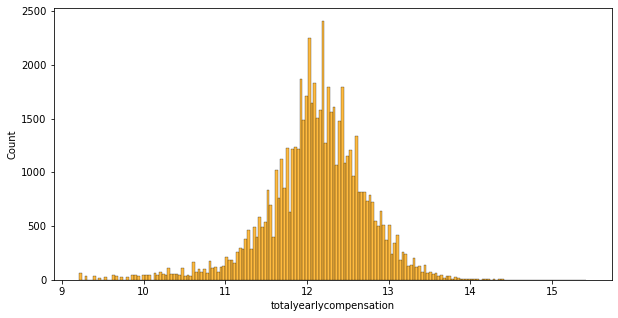

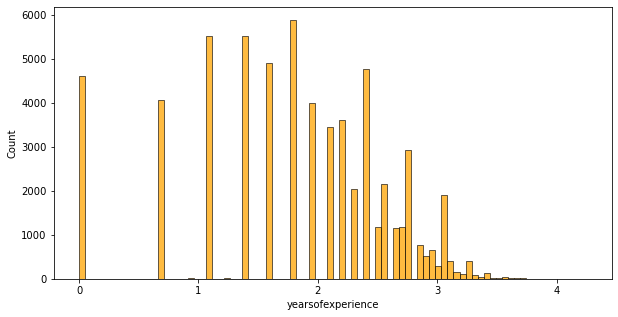

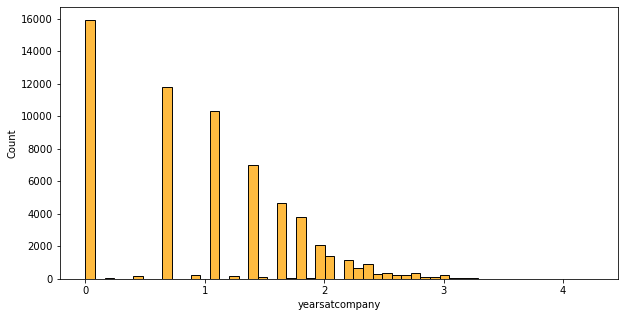

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
for l in logs:
    plt.figure(figsize=(10,5))
    sns.histplot(train[l],color='orange')
    plt.show()

In [125]:
#Gradient Boosting
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

salary = DataFrame(train)
salary.iloc[0]

timestamp                    6/7/2017 11:33
company                              Oracle
level                                    L3
title                       Product Manager
totalyearlycompensation            11.75195
location                   Redwood City, CA
yearsofexperience                  0.916291
yearsatcompany                     0.916291
tag                                   Other
gender                                Other
cityid                                 7392
dmaid                                 807.0
rowNumber                                 1
Masters_Degree                            0
Bachelors_Degree                          0
Doctorate_Degree                          0
Highschool                                0
Some_College                              0
Race_Asian                                0
Race_White                                0
Race_Two_Or_More                          0
Race_Black                                0
Race_Hispanic                   

In [126]:
salary.columns.values

array(['timestamp', 'company', 'level', 'title',
       'totalyearlycompensation', 'location', 'yearsofexperience',
       'yearsatcompany', 'tag', 'gender', 'cityid', 'dmaid', 'rowNumber',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'], dtype=object)

In [127]:
#Extracting year from timestamp and creating a new value for it
salary['year']=pd.DatetimeIndex(salary['timestamp']).year

In [203]:
salary.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation    float64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
gender                      object
cityid                       int64
dmaid                       object
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
year                         int64
dtype: object

In [218]:
#Label Encoding
from sklearn import preprocessing
label_object = {}
string_cols = ['company','level','title','location','tag','gender']

le = preprocessing.LabelEncoder()
salary[string_cols] = salary[string_cols].apply(le.fit_transform)

In [219]:
#Gradient Boosting Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor , HistGradientBoostingRegressor 
from sklearn.metrics import mean_squared_error

predictors = salary.drop(['totalyearlycompensation','timestamp','dmaid'], axis=1)
target = salary['totalyearlycompensation']

# Create Training and Test Split

X_train, X_test, y_train, y_test = train_test_split(predictors,target, random_state=42, test_size=0.3)

In [279]:
# Hyperparameters for GradientBoostingRegressor
    
gbr_params = {  'max_iter' : 500,
                'learning_rate': 0.01,
                'max_depth' : 4
            }

# Create an instance of gradient boosting regressor
gbr = HistGradientBoostingRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_iter=500)

In [280]:
# Print Coefficient of determination R^2
print("R-squared: %.3f" % gbr.score(X_test, y_test))

# Create the mean squared error
mse = math.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:.4f}".format(mse))

R-squared: 0.642
The root mean squared error (MSE) on test set: 0.3660


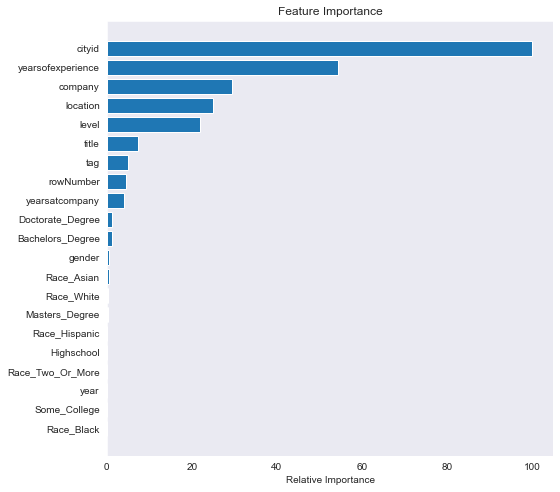

In [209]:
#Using relative feature importance

feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [210]:
salary.columns.values

array(['timestamp', 'company', 'level', 'title',
       'totalyearlycompensation', 'location', 'yearsofexperience',
       'yearsatcompany', 'tag', 'gender', 'cityid', 'dmaid', 'rowNumber',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'year'],
      dtype=object)

In [212]:
# Selecting important features from the relative variable importances
predictors = salary[['cityid','yearsofexperience','company','location','level','title','tag','yearsatcompany']]
target = salary['totalyearlycompensation']

# Create Training and Test Split

X_train, X_test, y_train, y_test = train_test_split(predictors,target, random_state=42, test_size=0.3)

In [247]:
from sklearn.model_selection import GridSearchCV , cross_val_score ,KFold , RandomizedSearchCV

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
GBR=HistGradientBoostingRegressor()
#search_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.01,.1,.2],'max_depth':[1,2,4,5],'subsample':[.5,.75,1],'random_state':[1]}
search_grid={'learning_rate':[0.1,0.2,0.3],
             'max_iter': [500,1000,2000,3000],
             'max_depth':[6,7,8,9]}
search=RandomizedSearchCV(estimator=GBR,param_distributions=search_grid,n_iter=10,n_jobs=2,cv=crossvalidation)

'\ngbr=GradientBoostingRegressor()\n\nparam_grid = {\n    "n_estimators": (100, 200, 500, 750, 1000),\n    \'learning_rate\': (0.01, 0.1, 0.2),\n    \'max_depth\':(4,5,6,7)}\nmodel_grid_search = GridSearchCV(estimator = gbr , param_grid=param_grid,\n                                 n_jobs=2, cv=2)\nmodel_grid_search\n'

In [248]:
search.fit(X_train,y_train)
search.best_params_

{'max_iter': 1000, 'max_depth': 7, 'learning_rate': 0.1}

In [249]:
search.best_score_

0.801445817690548

In [251]:
#GBR2=HistGradientBoostingRegressor(max_iter=1000,learning_rate=0.1,subsample=.5,max_depth=1,random_state=1)
GBR2=HistGradientBoostingRegressor(max_iter=1000,learning_rate=0.1,max_depth=7,random_state=1)
score=np.mean(cross_val_score(GBR2,X_train,y_train,cv=crossvalidation,n_jobs=2))
score

0.797498943615141

In [252]:
print(" Results from Randomized Search " )
print("\n Best estimator across ALL searched params:\n",search.best_estimator_)
print("\n Best score across ALL searched params:\n",search.best_score_)
print("\n Best parameters across ALL searched params:\n",search.best_params_)

 Results from Randomized Search 

 The best estimator across ALL searched params:
 HistGradientBoostingRegressor(max_depth=7, max_iter=1000)

 The best score across ALL searched params:
 0.801445817690548

 The best parameters across ALL searched params:
 {'max_iter': 1000, 'max_depth': 7, 'learning_rate': 0.1}


In [310]:
# Print Coefficient of determination R^2
print("R-squared: %.3f" % gbr.score(X_test,y_test))

# Create the mean squared error
rmse = math.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

R-squared: 0.642
The root mean squared error (RMSE) on test set: 0.3660


In [270]:
gbr1=HistGradientBoostingRegressor()

search_grid={'learning_rate':[0.1,0.2,0.3],
             'max_iter': [1000,2000,3000],
             'max_depth':[4,5,6,7]}

param_grid = {
    "n_estimators": [100, 200, 500, 750, 1000,2000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth':[4,5,6,7,8]}
model_rad_search = RandomizedSearchCV(estimator = gbr1 ,param_distributions=search_grid,n_iter=10,n_jobs=2,cv=crossvalidation)

In [272]:
model_rad_search.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=HistGradientBoostingRegressor(), n_jobs=2,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_iter': [1000, 2000, 3000]})

In [271]:
model_rad_search

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=HistGradientBoostingRegressor(), n_jobs=2,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_iter': [1000, 2000, 3000]})

In [273]:
model_rad_search.best_params_

{'max_iter': 3000, 'max_depth': 7, 'learning_rate': 0.1}

In [275]:
model_rad_search.best_score_

0.8012232643553056